## Apresentação Derivaticos Climáticos 

##### Autor: Mateus Barchilha Lopes Marques
##### mateus.marques@riobravo.com.br
##### riscos@riobravo.com.br

### Coleta e Tratamento dos Dados

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 

tempbr = pd.read_csv(r"C:\Users\Mateus.Marques\Repositórios\DerivativosClimaticos\Dados_historicos_inmet\camposdojordao.csv", sep=';')

In [22]:
tempbr.isnull().value_counts()
count = 0 
for i in tempbr.isnull().value_counts():
    count += i
print(count)

7306


In [23]:
tempbr = tempbr.dropna()

In [24]:
tempbr.head()

,Data Medicao,"TEMPERATURA MAXIMA, DIARIA (AUT)(°C)","TEMPERATURA MEDIA, DIARIA (AUT)(°C)","TEMPERATURA MINIMA, DIARIA (AUT)(°C)"
73,14/08/2004,25.8,17.7,12.7
74,15/08/2004,26.9,18.9,13.1
75,16/08/2004,24.9,17.5,14.1
76,17/08/2004,25.5,18.0,14.5
848,28/09/2006,19.0,13.9,7.6


In [25]:
tempbr.describe()

,"TEMPERATURA MAXIMA, DIARIA (AUT)(°C)","TEMPERATURA MEDIA, DIARIA (AUT)(°C)","TEMPERATURA MINIMA, DIARIA (AUT)(°C)"
count,5932.000000,5932.000000,5932.000000
mean,21.406726,14.953136,10.646848
std,3.596109,2.953425,3.618363
min,6.500000,3.700000,-3.300000
25%,19.000000,12.800000,8.100000
50%,21.700000,15.400000,11.250000
75%,24.200000,17.200000,13.500000
max,31.000000,23.300000,18.900000


In [26]:
tempbr['Data Medicao'] = pd.to_datetime(tempbr['Data Medicao'], format='%d/%m/%Y', errors='coerce')

In [27]:
tempbr_estação = tempbr.copy(deep=True)
tempbr_estação['Mês'] = tempbr_estação['Data Medicao'].dt.month
mask = (tempbr_estação['Mês'] >= 4) & (tempbr_estação['Mês'] <= 10)
tempbr_estação['Inverno'] = np.where(mask, 1, 0)
tempbr_estação['Verão'] = np.where(tempbr_estação['Inverno'] != 1, 1, 0)
tempbr_estação.head()

,Data Medicao,"TEMPERATURA MAXIMA, DIARIA (AUT)(°C)","TEMPERATURA MEDIA, DIARIA (AUT)(°C)","TEMPERATURA MINIMA, DIARIA (AUT)(°C)",Mês,Inverno,Verão
73,2004-08-14,25.8,17.7,12.7,8,1,0
74,2004-08-15,26.9,18.9,13.1,8,1,0
75,2004-08-16,24.9,17.5,14.1,8,1,0
76,2004-08-17,25.5,18.0,14.5,8,1,0
848,2006-09-28,19.0,13.9,7.6,9,1,0


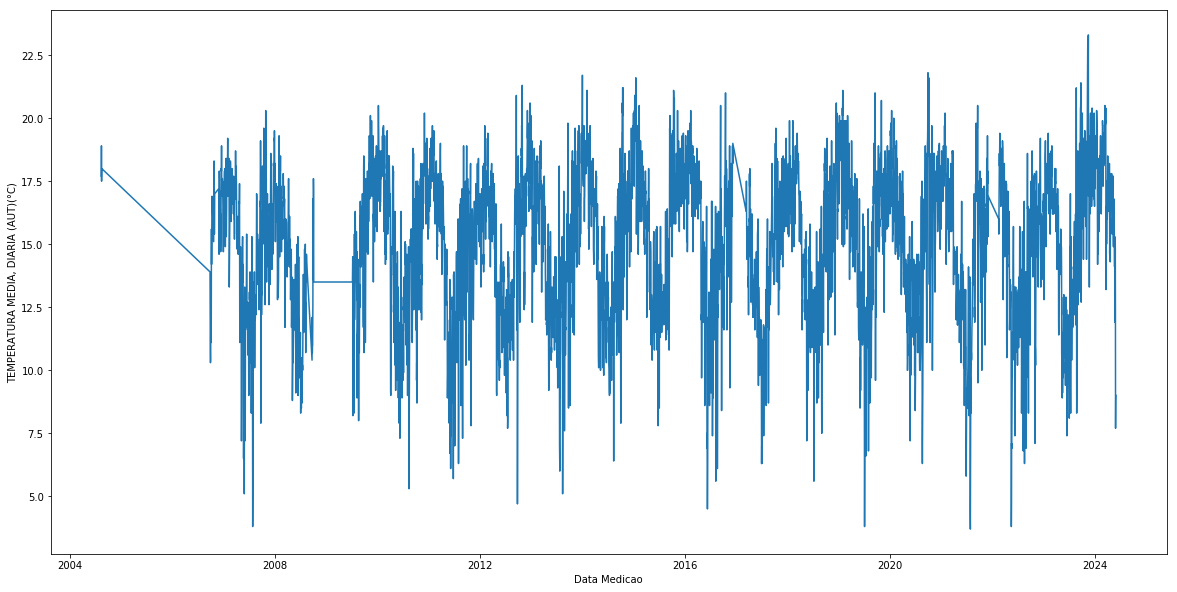

In [28]:
plt.figure(figsize=(20,10))
plot = sns.lineplot(x='Data Medicao', y='TEMPERATURA MEDIA, DIARIA (AUT)(°C)', data=tempbr_estação)
plt.show()

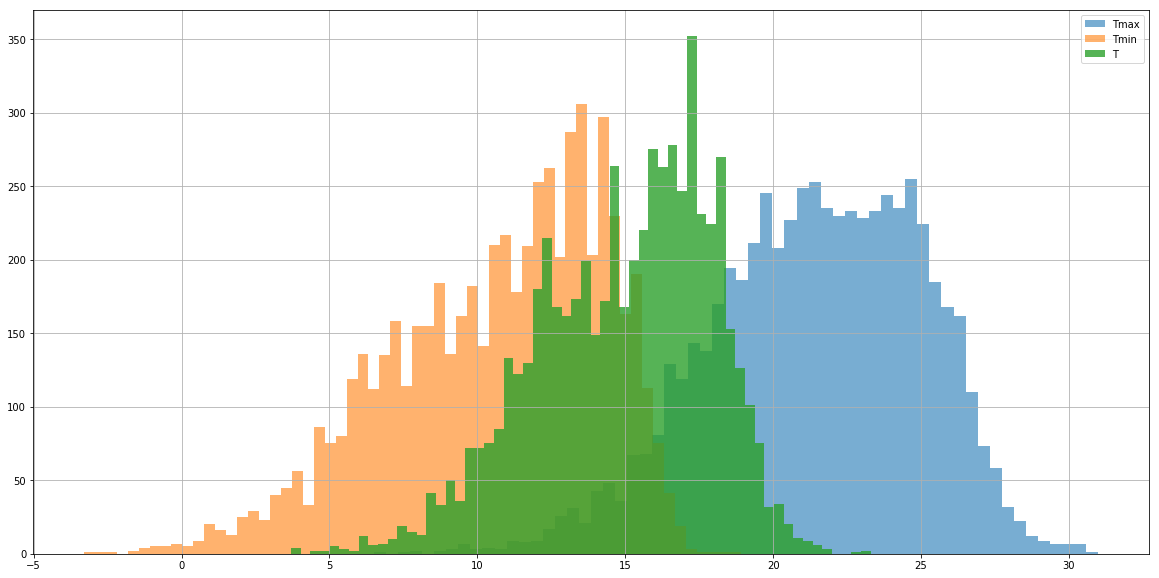

In [29]:

# Distribuição das temperaturas em histograma
plt.figure(figsize=(20, 10))
tempbr_estação['TEMPERATURA MAXIMA, DIARIA (AUT)(°C)'].hist(bins=60, alpha=0.6, label='Tmax')
tempbr_estação['TEMPERATURA MINIMA, DIARIA (AUT)(°C)'].hist(bins=60, alpha=0.6, label='Tmin')
tempbr_estação['TEMPERATURA MEDIA, DIARIA (AUT)(°C)'].hist(bins=60, alpha=0.8, label='T')
plt.legend()
plt.show()


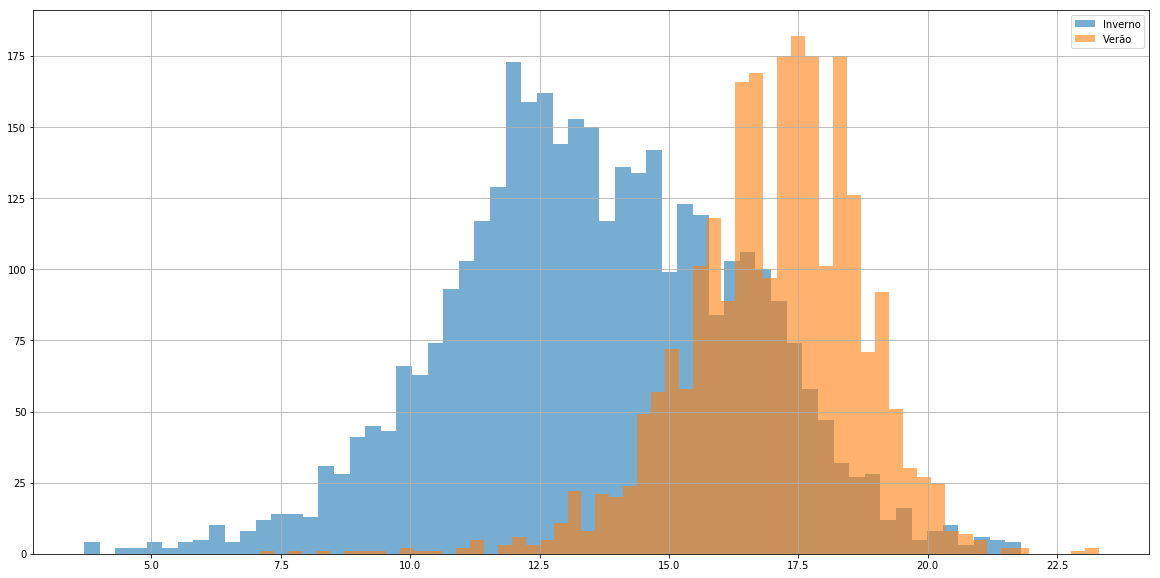

In [30]:
plt.figure(figsize=(20, 10))
tempbr_estação[tempbr_estação['Inverno'] == 1]['TEMPERATURA MEDIA, DIARIA (AUT)(°C)'].hist(bins=60, alpha=0.6, label='Inverno')
tempbr_estação[tempbr_estação['Verão'] == 1]['TEMPERATURA MEDIA, DIARIA (AUT)(°C)'].hist(bins=60, alpha=0.6, label='Verão')
plt.legend()
plt.show()

### Modelagem

In [31]:
from scipy.optimize import curve_fit

temp_t = tempbr_estação['TEMPERATURA MEDIA, DIARIA (AUT)(°C)'].copy(deep=True)
temp_t = temp_t.to_frame()

#definindo os modelos
#minimos quadrados
def model_fit(t, a, a2, a3, a4):
    omega = 2*np.pi/365
    y_pred = a + a2 * t + a3 * np.sin(omega*t) + a4 * np.cos(omega*t)
    return y_pred

t = np.arange(len(temp_t))
X = temp_t['TEMPERATURA MEDIA, DIARIA (AUT)(°C)'].values

params, _ = curve_fit(model_fit, t, X)
a1, a2, a3, a4 = params

A = a1  
B = a2
C = np.sqrt(a3**2 + a4**2)
phi = np.arctan2(a4, a3) - np.pi 

print(f"A = {A}, B = {B}, C = {C}, phi = {phi}")

A = 14.633501031754193, B = 0.00010042916458178734, C = 1.645716604908219, phi = -2.668819588709775


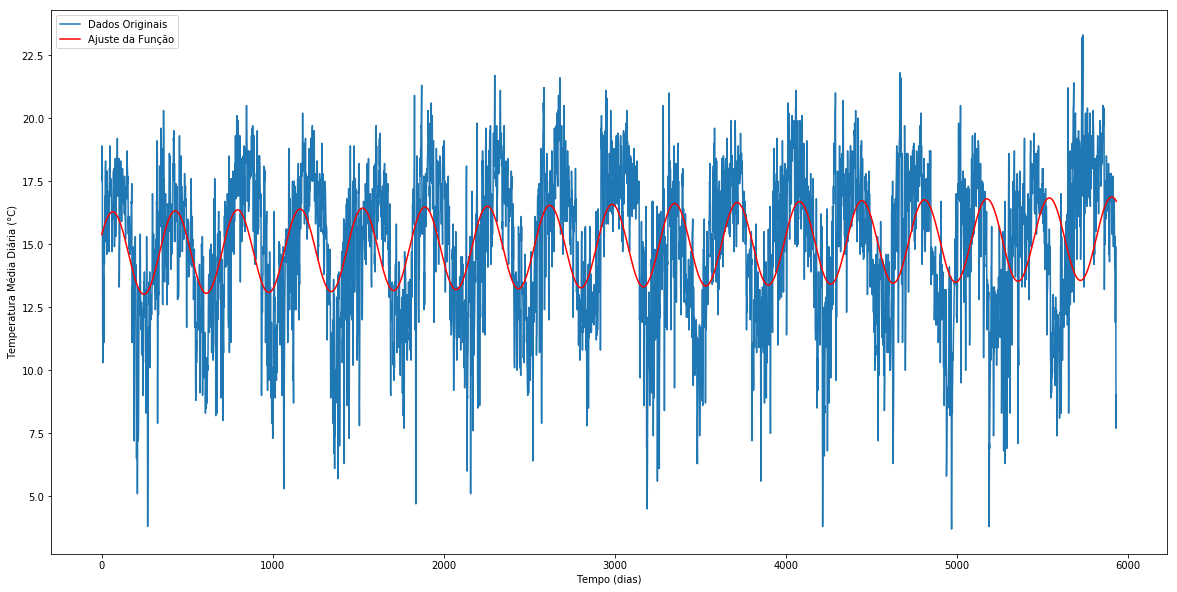

In [32]:
plt.figure(figsize=(20, 10))
plt.plot(t, X, label='Dados Originais')
plt.plot(t, model_fit(t, *params), label='Ajuste da Função', color='red')
plt.xlabel('Tempo (dias)')
plt.ylabel('Temperatura Média Diária (°C)')
plt.legend()
plt.show()

In [33]:
T = tempbr['TEMPERATURA MEDIA, DIARIA (AUT)(°C)'].values
N = len(T)
sigma_1 = np.sum((T[1:] - T[:-1])**2)/N

def regressao_sigma(T):
    Tm = np.mean(T)
    a = np.sum((T[1:] - Tm)*(T[:-1] - Tm))/np.sum((T[:-1] - Tm)**2)
    sigma = np.sqrt(np.sum((T[1:] - Tm - a*(T[:-1] - Tm))**2)/(N-2))
    return a, sigma

a, sigma_2 = regressao_sigma(T)

print(f"Primeira estimativa de sigma: {sigma_1}")
print(f"Segunda estimativa de sigma: {sigma_2}")

Primeira estimativa de sigma: 2.0387946729602158
Segunda estimativa de sigma: 1.385913441487289


In [34]:
from scipy.optimize import minimize

def E_T(T_i_minus_1, T_i_minus_1_m, T_i_m, a):
    return (T_i_minus_1 - T_i_minus_1_m) * np.exp(-a) + T_i_m

# Função para derivada \dot{b}(T_t; a)
def b_dot(T_i_minus_1, T_i_minus_1_m, T_i, a):
    return T_i - E_T(T_i_minus_1, T_i_minus_1_m, T_i, a)

# Função G_n(a)
def G_n(a, T, T_m, sigma):
    n = len(T)
    G = 0
    for i in range(1, n):
        T_i = T[i]
        T_i_minus_1 = T[i-1]
        T_i_m = T_m[i]
        T_i_minus_1_m = T_m[i-1]
        sigma_i_minus_1 = sigma
        G += b_dot(T_i_minus_1, T_i_minus_1_m, T_i, a) / sigma_i_minus_1**2 * (T_i - E_T(T_i_minus_1, T_i_minus_1_m, T_i_m, a))
    return G

# Função para otimizar e encontrar \hat{a}_n
def optimize_a(T, T_m, sigma):
    result = minimize(lambda a: G_n(a, T, T_m, sigma)**2, x0=0, method='L-BFGS-B')
    return result.x[0]

# Estimativa da média móvel da série temporal (usando uma janela de 365 dias)
T_m = np.convolve(T, np.ones(365)/365, mode='same')

# Usando a primeira estimativa de sigma (sigma_1)
sigma = sigma_1

# Estimativa do parâmetro a
a_hat = optimize_a(T, T_m, sigma)

print(f"Estimativa do parâmetro a: {a_hat}")

Estimativa do parâmetro a: 0.10945977763010512


### Precificação - Simulações de Monte Carlo com o Processo Estocástico de Ornstein-Uhlenbeck

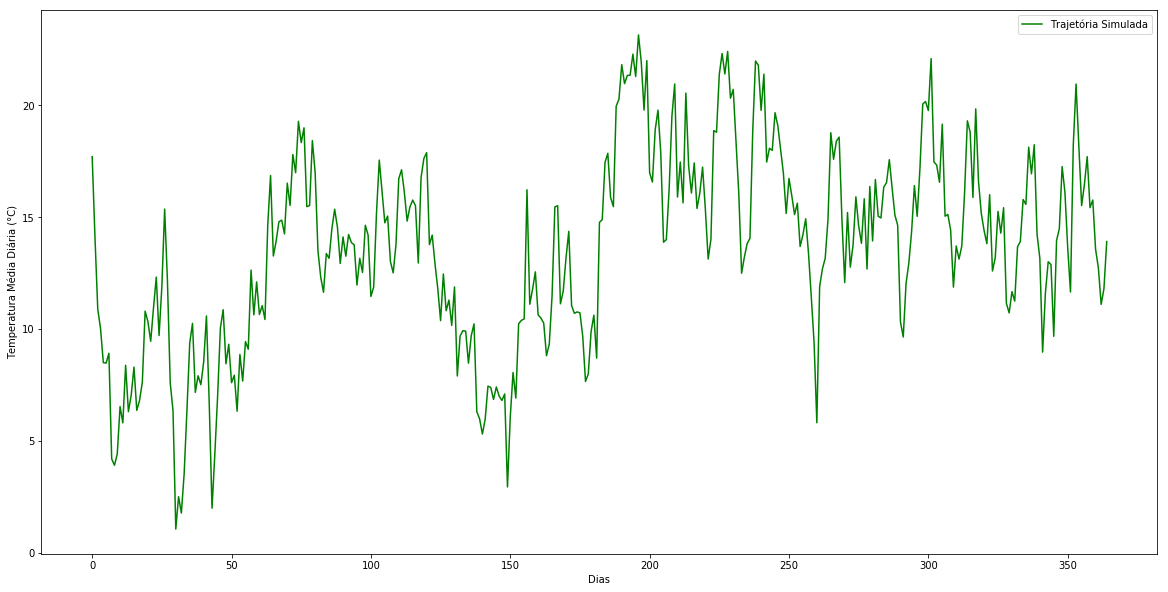

In [35]:
from scipy.integrate import quad
from scipy.stats import norm

a =  a_hat  # parâmetro de reversão à média estimado
sigma = sigma_1  # volatilidade estimada
B = B  # parâmetro de tendência estimado
omega = 2*np.pi/365  # frequência anual
C = C  # amplitude da sazonalidade estimada
phi = phi  # fase da sazonalidade estimada

# Simular a trajetória do processo de Ornstein-Uhlenbeck
def EDE_OrnsteinUhlenbeck(T0, T_m, a, sigma, n_steps, dt, B, C, omega, phi):
    T = np.zeros(n_steps)
    T[0] = T0
    for t in range(1, n_steps):
        T_t_m = T_m[t]
        dT_t = B + omega * C * np.cos(omega * t + phi)
        T[t] = T[t-1] + dT_t * dt + a * (T_t_m - T[t-1]) * dt + sigma * np.sqrt(dt) * np.random.normal()
    return T

# Simular para 1 ano (365 dias)
n_steps = 365
dt = 1
T0 = T[0]
T_m = np.convolve(T, np.ones(365)/365, mode='same')

T_sim = EDE_OrnsteinUhlenbeck(T0, T_m, a, sigma, n_steps, dt, B, C, omega, phi)

# Plotar a trajetória simulada
plt.figure(figsize=(20, 10))
plt.plot(T_sim, label='Trajetória Simulada', color='green')
plt.xlabel('Dias')
plt.ylabel('Temperatura Média Diária (°C)')
plt.legend()
plt.show()

In [36]:
# Criar um dataframe com as temperaturas simuladas
datas = pd.date_range(start='2024-04-01', periods=n_steps)
tempbr_estação = pd.DataFrame({'Data Medicao': datas, 'Temperatura': T_sim})
print(tempbr_estação.head())

  Data Medicao  Temperatura
0   2024-04-01    17.700000
1   2024-04-02    14.101016
2   2024-04-03    10.878659
3   2024-04-04    10.012682
4   2024-04-05     8.488936


In [37]:
# Definir a temperatura base
T_base = 18

# Calcular o HDD
def hdd(T, T_base):
    return np.maximum(T_base - T, 0)

tempbr_estação['HDD'] = hdd(tempbr_estação['Temperatura'], T_base)

# Calcular o H_n (soma acumulada do HDD)
tempbr_estação['H_n'] = tempbr_estação['HDD'].cumsum()

print(tempbr_estação.head())


  Data Medicao  Temperatura       HDD        H_n
0   2024-04-01    17.700000  0.300000   0.300000
1   2024-04-02    14.101016  3.898984   4.198984
2   2024-04-03    10.878659  7.121341  11.320324
3   2024-04-04    10.012682  7.987318  19.307642
4   2024-04-05     8.488936  9.511064  28.818706


In [38]:
# Definir os meses de inverno
tempbr_estação[tempbr_estação['Data Medicao'].dt.year == 2024]
tempbr_estação['Mês'] = tempbr_estação['Data Medicao'].dt.month
mask_inverno = (tempbr_estação['Mês'] >= 4) & (tempbr_estação['Mês'] <= 10)
tempbr_estação['Inverno'] = np.where(mask_inverno, 1, 0)

# Filtrar apenas os meses de inverno
tempbr_inverno = tempbr_estação[tempbr_estação['Inverno'] == 1]

# Exibir as primeiras linhas do dataframe de inverno
print(tempbr_inverno.head())


  Data Medicao  Temperatura       HDD        H_n  Mês  Inverno
0   2024-04-01    17.700000  0.300000   0.300000    4        1
1   2024-04-02    14.101016  3.898984   4.198984    4        1
2   2024-04-03    10.878659  7.121341  11.320324    4        1
3   2024-04-04    10.012682  7.987318  19.307642    4        1
4   2024-04-05     8.488936  9.511064  28.818706    4        1


In [39]:
from tabulate import tabulate
tempbr_inverno[tempbr_inverno['Data Medicao'].dt.year == 2024]
# Calcular média dos índices HDD mensais e mediana para 2024
hdd_mensal_2024 = tempbr_inverno.groupby(tempbr_inverno['Data Medicao'].dt.to_period('M')).mean()['HDD']
mediana_hdd = hdd_mensal_2024.median()

# Preparar dados para a tabela
data = [[month.strftime('%Y-%m'), hdd] for month, hdd in hdd_mensal_2024.items()]
data.append(['Mediana', mediana_hdd])
headers = ['Mês', 'Média HDD']
table = tabulate(data, headers=headers, tablefmt='grid')
print(table)

+---------+-------------+
| Mês     |   Média HDD |
+=========+=============+
| 2024-04 |    8.9662   |
+---------+-------------+
| 2024-05 |   10.3223   |
+---------+-------------+
| 2024-06 |    3.12797  |
+---------+-------------+
| 2024-07 |    3.38088  |
+---------+-------------+
| 2024-08 |    9.32077  |
+---------+-------------+
| 2024-09 |    6.75277  |
+---------+-------------+
| 2024-10 |    0.838426 |
+---------+-------------+
| Mediana |    6.75277  |
+---------+-------------+


In [40]:
# Definir parâmetros da opção
alpha = 500  # montante tick
strike = mediana_hdd
H_n_inverno = tempbr_inverno['H_n'].iloc[-1]

# Calcular o payoff da opção
def calcular_payoff_opcao(H_n, K, alpha):
    return alpha * np.maximum(H_n - K, 0)

payoff_opcao = calcular_payoff_opcao(H_n_inverno, strike, alpha)

print(f"Payoff da opção climática de compra com strike {strike}: {payoff_opcao}")

Payoff da opção climática de compra com strike 6.7527720146637655: 649193.9368955356


In [41]:
# Definir parâmetros da opção
alpha = alpha  # montante tick
n_steps = 210 #dias inverno
r = 0.1075  # taxa de juros livre de risco

# Calcular o payoff da opção para diferentes strikes
strikes = np.arange(4, 11, 1)  # Strikes de 4 a 10
payoffs_opcao = []

for K in strikes:
    payoff = calcular_payoff_opcao(H_n_inverno, K, alpha)
    payoffs_opcao.append(payoff)

# Calcular o valor presente do payoff médio da opção de compra sobre Ornstein-Uhlenbeck
payoff_vp = np.exp(-r * n_steps / 210) * np.mean(payoffs_opcao)

# Preparar dados para a tabela
payoff_data = []
for strike, payoff in zip(strikes, payoffs_opcao):
    payoff_data.append([strike, f'R$ {payoff:,.2f}'.replace(',', 'X').replace('.', ',').replace('X', '.')])

# Adicionar o preço médio da opção no final da tabela
payoff_data.append(['Payoff VP', f'R$ {payoff_vp:,.2f}'.replace(',', 'X').replace('.', ',').replace('X', '.')])

# Preparar os cabeçalhos para a tabela
headers = ['Strike', 'Payoff']

# Gerar a tabela usando tabulate
table = tabulate(payoff_data, headers=headers, tablefmt='grid')

# Exibir a tabela
print(table)

# Exibir os preços das opções para diferentes strikes
for strike, preco in zip(strikes, payoffs_opcao):
    print(f"Payoff da opção climática de compra com strike {strike}: R$ {preco:,.2f}".replace(',', 'X').replace('.', ',').replace('X', '.'))


+-----------+---------------+
| Strike    | Payoff        |
+===========+===============+
| 4         | R$ 650.570,32 |
+-----------+---------------+
| 5         | R$ 650.070,32 |
+-----------+---------------+
| 6         | R$ 649.570,32 |
+-----------+---------------+
| 7         | R$ 649.070,32 |
+-----------+---------------+
| 8         | R$ 648.570,32 |
+-----------+---------------+
| 9         | R$ 648.070,32 |
+-----------+---------------+
| 10        | R$ 647.570,32 |
+-----------+---------------+
| Payoff VP | R$ 582.914,82 |
+-----------+---------------+
Payoff da opção climática de compra com strike 4: R$ 650.570,32
Payoff da opção climática de compra com strike 5: R$ 650.070,32
Payoff da opção climática de compra com strike 6: R$ 649.570,32
Payoff da opção climática de compra com strike 7: R$ 649.070,32
Payoff da opção climática de compra com strike 8: R$ 648.570,32
Payoff da opção climática de compra com strike 9: R$ 648.070,32
Payoff da opção climática de compra com strike